### Description

In data-merger, we merged the data. In this notebook, we will create some basic visualizations of the data.

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

aReserveDF = pd.read_csv('air_reserve.csv', parse_dates = ['visit_datetime', 'reserve_datetime']) 
aVisitDF = pd.read_csv('air_visit_data.csv', parse_dates = ['visit_date']) 
aStoreDF = pd.read_csv('air_store_info.csv')

hReserveDF = pd.read_csv('hpg_reserve.csv', parse_dates = ['visit_datetime', 'reserve_datetime']) 
hStoreDF = pd.read_csv('hpg_store_info.csv') 

dateInfoDF = pd.read_csv('date_info.csv', parse_dates = ['calendar_date'])
sampleSubmissionDF = pd.read_csv('sample_submission.csv') 
storeIdRelationDF = pd.read_csv('store_id_relation.csv') 
hReserveDF['visit_year'] = hReserveDF['visit_datetime'].dt.year
hReserveDF['visit_month'] = hReserveDF['visit_datetime'].dt.month
hReserveDF['visit_day'] = hReserveDF['visit_datetime'].dt.day
hReserveDF['reserve_year'] = hReserveDF['reserve_datetime'].dt.year#
hReserveDF['reserve_month'] = hReserveDF['reserve_datetime'].dt.month
hReserveDF['reserve_day'] = hReserveDF['reserve_datetime'].dt.day
#hReserveDF.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)

hReserveDF = hReserveDF.groupby(['hpg_store_id', 'visit_year', 'visit_month','visit_day','reserve_year','reserve_month','reserve_day', 'reserve_datetime', 'visit_datetime'], as_index=False).sum()
aReserveDF['visit_year'] = aReserveDF['visit_datetime'].dt.year
aReserveDF['visit_month'] = aReserveDF['visit_datetime'].dt.month
aReserveDF['visit_day'] = aReserveDF['visit_datetime'].dt.day
aReserveDF['reserve_year'] = aReserveDF['reserve_datetime'].dt.year
aReserveDF['reserve_month'] = aReserveDF['reserve_datetime'].dt.month
aReserveDF['reserve_day'] = aReserveDF['reserve_datetime'].dt.day

#aReserveDF.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)
dateInfoDF['calendar_year'] = dateInfoDF['calendar_date'].dt.year
dateInfoDF['calendar_month'] = dateInfoDF['calendar_date'].dt.month
dateInfoDF['calendar_day'] = dateInfoDF['calendar_date'].dt.day
dateInfoDF.drop(['calendar_date'], axis=1, inplace=True)
aVisitDF['visit_year'] = aVisitDF['visit_date'].dt.year
aVisitDF['visit_month'] = aVisitDF['visit_date'].dt.month
aVisitDF['visit_day'] = aVisitDF['visit_date'].dt.day
aVisitDF.drop(['visit_date'], axis=1, inplace=True)

hReserveDF = pd.merge(hReserveDF, storeIdRelationDF, on='hpg_store_id', how='inner')
hReserveDF.drop(['hpg_store_id'], axis=1, inplace=True)
aReserveDF = pd.concat([aReserveDF, hReserveDF])
aReserveDF = aReserveDF.groupby(['air_store_id', 'visit_year', 'visit_month','visit_day', 'visit_datetime', 'reserve_datetime'],\
                         as_index=False).sum().drop(['reserve_day','reserve_month','reserve_year'], axis=1)
aReserveDF = pd.merge(aReserveDF, dateInfoDF, left_on=['visit_year','visit_month','visit_day'], right_on=['calendar_year','calendar_month','calendar_day'], how='left')
aReserveDF.drop(['calendar_year','calendar_month','calendar_day'], axis=1, inplace=True)
aReserveDF = pd.merge(aReserveDF, aStoreDF, on='air_store_id', how='left')
trainDF = pd.merge(aReserveDF, aVisitDF, on=['air_store_id','visit_year','visit_month','visit_day'], how='left')
trainDF.fillna(0,inplace=True)

In [2]:
trainDF.head()

,air_store_id,visit_year,visit_month,visit_day,visit_datetime,reserve_datetime,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,visitors
0,air_00a91d42b08b08d9,2016,1,14,2016-01-14 19:00:00,2016-01-11 14:00:00,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
1,air_00a91d42b08b08d9,2016,1,15,2016-01-15 18:00:00,2016-01-09 20:00:00,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
2,air_00a91d42b08b08d9,2016,1,16,2016-01-16 18:00:00,2016-01-13 20:00:00,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
3,air_00a91d42b08b08d9,2016,1,22,2016-01-22 18:00:00,2016-01-19 08:00:00,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0
4,air_00a91d42b08b08d9,2016,1,29,2016-01-29 18:00:00,2016-01-23 18:00:00,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0


In [3]:
current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)

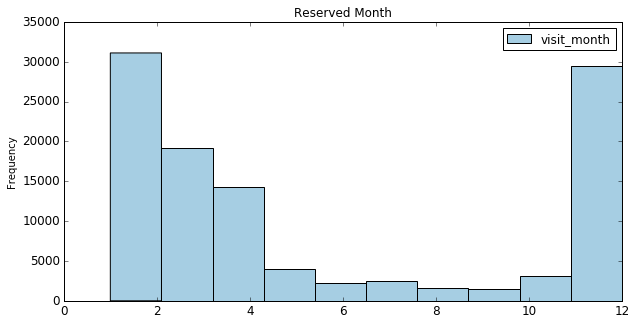

In [4]:
month_plot = trainDF['visit_month'].plot(kind='hist', title='Reserved Month', figsize=(10,5),legend=True,fontsize=12)

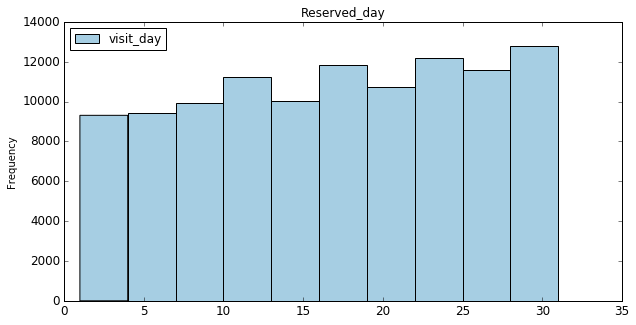

In [5]:
day_plot = trainDF['visit_day'].plot(kind='hist', title='Reserved_day', figsize=(10,5),legend=True,fontsize=12)

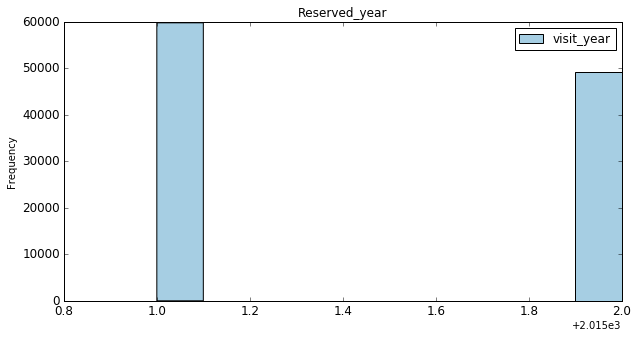

In [6]:
year_plot = trainDF['visit_year'].plot(kind='hist', title='Reserved_year', figsize=(10,5),legend=True,fontsize=12)

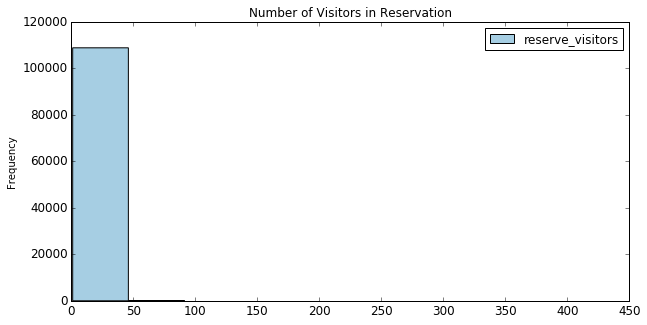

In [7]:
day_plot = trainDF['reserve_visitors'].plot(kind='hist', title='Number of Visitors in Reservation', figsize=(10,5),legend=True,fontsize=12)

In [8]:
pd.crosstab(index=trainDF['reserve_visitors'],columns="count")

col_0,count
reserve_visitors,
1,1420
2,41033
3,16305
4,16484
5,6894
6,6658
7,3308
8,3834
9,1731


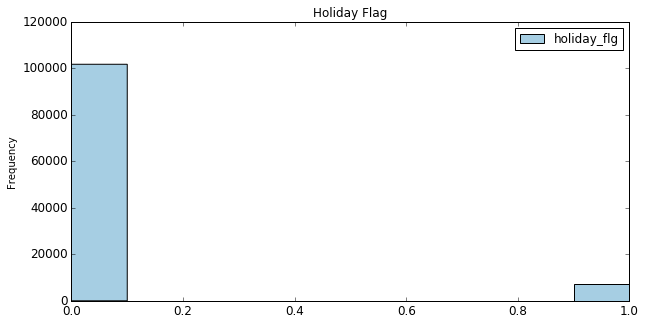

In [9]:
day_plot = trainDF['holiday_flg'].plot(kind='hist', title='Holiday Flag', figsize=(10,5),legend=True,fontsize=12)

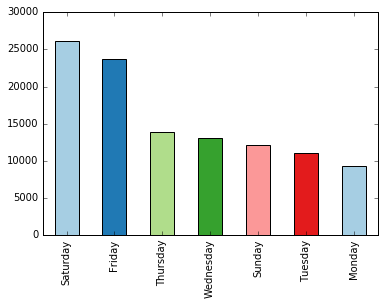

In [10]:
trainDF['day_of_week'].value_counts().plot(kind='bar')

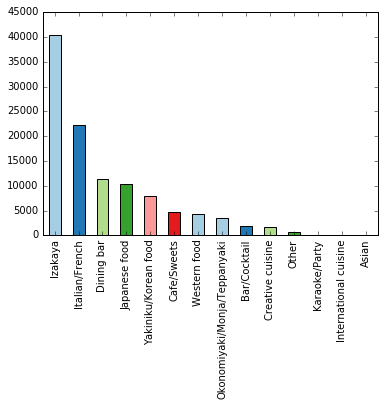

In [11]:
trainDF['air_genre_name'].value_counts().plot(kind='bar')

### Analysis of above histograms

We find that that most reservations are made in the winter and early spring.

There doesn't seem to be any particular time in the month (e.g., beginning, middle, or end for which reservations are made.)

More reservations occur for dates in 2015.

The  most popular days for reservations are for Fridays and Saturdays. Compared to Fridays and Saturdays, reservations for other days of the week are about equal. An interesting point is that Sunday has about the same number of reservations as a "weekday" day.

There are more non-holiday days than holiday days in the data set.

In our histogram plotting the reserve_visitors, we saw that the number of visitors for which a reservation was made was biased towards the left. The pandas crosstab function was used to get get a frequency count for the number of reserve_visitors. We saw that on the high end, reservations were made for 2241 guests for a particular date.

Izakaya is the most popular food genre. Italian/French is the second most popular food genre.

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


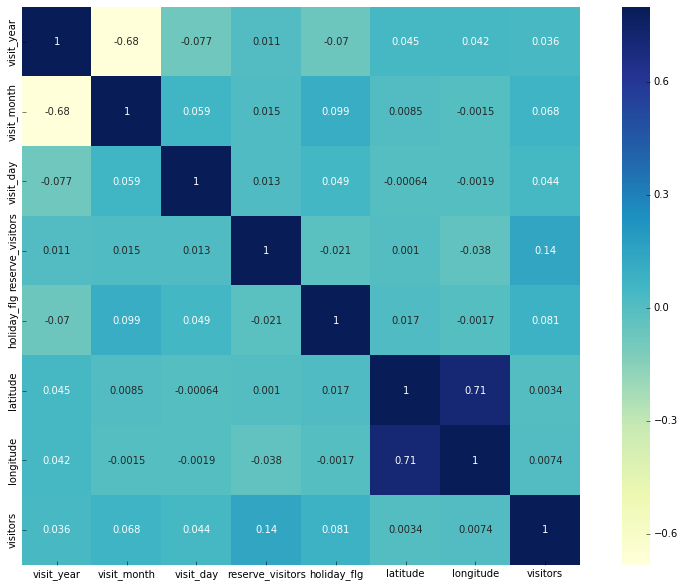

In [12]:
plt.subplots(figsize=(15,10))
sns.heatmap(trainDF.corr(),vmax=0.8,square=True,annot=True,cmap="YlGnBu")

How often, on average, do people make reservations ahead of time?

In [19]:
visitorDates = pd.to_datetime(trainDF['visit_datetime'])
reserveDates = pd.to_datetime(trainDF['reserve_datetime'])
dayDifference = visitorDates-reserveDates
days = dayDifference.dt.days
days.describe()

count    109014.000000
mean          7.886033
std          23.375245
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max         393.000000
dtype: float64

In [17]:
trainDF.describe()

,visit_year,visit_month,visit_day,reserve_visitors,holiday_flg,latitude,longitude,visitors,timedDiff
count,109014.000000,109014.000000,109014.00000,109014.000000,109014.000000,109014.000000,109014.000000,109014.000000,109014.000000
mean,2016.451630,5.626204,16.30996,4.926055,0.066762,36.253664,137.101821,29.069193,7.886033
std,0.497657,4.128895,8.63269,5.631394,0.249611,2.996163,3.818238,21.806746,23.375245
min,2016.000000,1.000000,1.00000,1.000000,0.000000,33.211967,130.348436,0.000000,0.000000
25%,2016.000000,2.000000,9.00000,2.000000,0.000000,34.681261,134.685353,13.000000,0.000000
50%,2016.000000,4.000000,17.00000,3.000000,0.000000,35.629564,138.971940,26.000000,2.000000
75%,2017.000000,11.000000,24.00000,5.000000,0.000000,35.699537,139.770825,41.000000,8.000000
max,2017.000000,12.000000,31.00000,450.000000,1.000000,44.020632,144.273398,244.000000,393.000000


Add a column to the DF showing the number of days between reservation time and visit time

In [ ]:
trainDF['timedDiff'] = days

In [21]:
trainDF.head()

,air_store_id,visit_year,visit_month,visit_day,visit_datetime,reserve_datetime,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,visitors,timedDiff
0,air_00a91d42b08b08d9,2016,1,14,2016-01-14 19:00:00,2016-01-11 14:00:00,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,3
1,air_00a91d42b08b08d9,2016,1,15,2016-01-15 18:00:00,2016-01-09 20:00:00,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,5
2,air_00a91d42b08b08d9,2016,1,16,2016-01-16 18:00:00,2016-01-13 20:00:00,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,2
3,air_00a91d42b08b08d9,2016,1,22,2016-01-22 18:00:00,2016-01-19 08:00:00,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,3
4,air_00a91d42b08b08d9,2016,1,29,2016-01-29 18:00:00,2016-01-23 18:00:00,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,0.0,6
